# Autant d'équations que de paramètres libres : l'ajustement exact



M: [[2. 1.]
 [7. 1.]]
Inv M : [[-0.2  0.2]
 [ 1.4 -0.4]]
coefficients : [ 1.6 -0.2]
M [[2.         1.        ]
 [2.26315789 1.        ]
 [2.52631579 1.        ]
 [2.78947368 1.        ]
 [3.05263158 1.        ]
 [3.31578947 1.        ]
 [3.57894737 1.        ]
 [3.84210526 1.        ]
 [4.10526316 1.        ]
 [4.36842105 1.        ]
 [4.63157895 1.        ]
 [4.89473684 1.        ]
 [5.15789474 1.        ]
 [5.42105263 1.        ]
 [5.68421053 1.        ]
 [5.94736842 1.        ]
 [6.21052632 1.        ]
 [6.47368421 1.        ]
 [6.73684211 1.        ]
 [7.         1.        ]]
[ 3.          3.42105263  3.84210526  4.26315789  4.68421053  5.10526316
  5.52631579  5.94736842  6.36842105  6.78947368  7.21052632  7.63157895
  8.05263158  8.47368421  8.89473684  9.31578947  9.73684211 10.15789474
 10.57894737 11.        ]


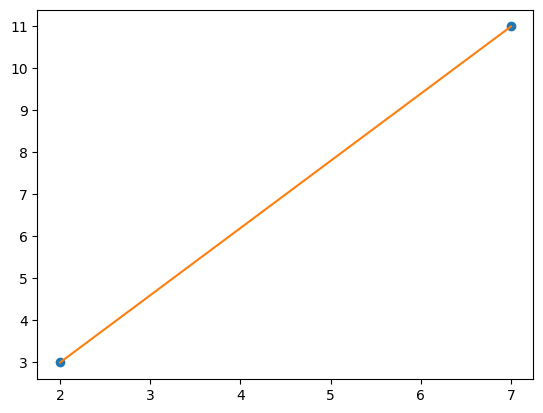

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([2,7])
y=np.array([3,11])

M=np.empty((2,2)) 

M[:,0]=x  #  on affecte la première colonne 
M[:,1]=np.array([1,1]) # on affecte la deuxième colonne

param=np.linalg.inv(M) @ y

print("M:",M)
print("Inv M :",np.linalg.inv(M))
print("coefficients :",param)

xx=np.linspace(min(x),max(x),20)

M=np.empty((20,2))

M[:,0]=xx
M[:,1]=np.ones(20)

print("M", M)

yy= M @ param

print(yy)
plt.plot(x,y,"o")
plt.plot(xx,yy,'-')


# Plus d'équations que de paramètres libres : un ajustement aux moindres carrés

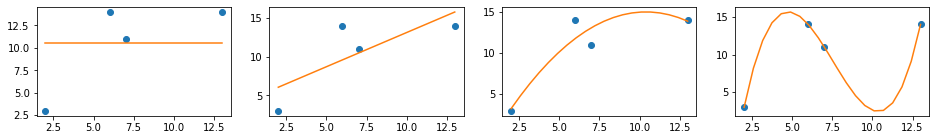

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def compute_matrix_M(n,     # nombre de points
                     order, # ordre du polynôme
                     x):  
  M=np.empty((n,order))
  for i in range(order):
    M[:,i]=(x**(order-i-1)).T  # ** : fonction puissance
  return(M)

def compute_parameters(M,y): # calcul des paramètres optimaux au sens des moindres carrés
  return(np.linalg.inv(M.T @ M) @ M.T @ y)

x=np.array([2,7,13,6])        # données (abscisses)
y=np.array([3,11,14,14])      # données (ordonnées correspondantes)

fig, axs = plt.subplots(1,4,figsize=(16, 2))

for order in [1,2,3,4]:  # liste des ordres de polynôme qu'on veut tester
  M=compute_matrix_x(len(x),order,x)
  param=compute_parameters(M,y)

  xx=np.linspace(min(x),max(x),20)  # abscisses du tracé de polynôme
  yy=np.zeros(20)                   # ordonnées du tracé de polynôme

  for i in range(order):
    yy=yy+param[i]*xx**(order-i-1)
  
  axs[order-1].plot(x,y,"o")
  axs[order-1].plot(xx,yy,'-')
 